# Triplet Sampling Algorithm

This notebook examines, qualitatively, how well our triplet sampling algorithm works.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, ToPILImage, Resize, Compose

from datasets import StanfordCars
from utils import pick_index_of_negative_sample, pick_index_of_positive_sample

In [2]:
cars_transform = Compose([
    Resize((600, 600)),
    ToTensor(),
])

stanford_cars = StanfordCars(root='assets', split='train', transform=cars_transform, classify_by_year=True)
data_loader = DataLoader(stanford_cars, batch_size=20, shuffle=True)

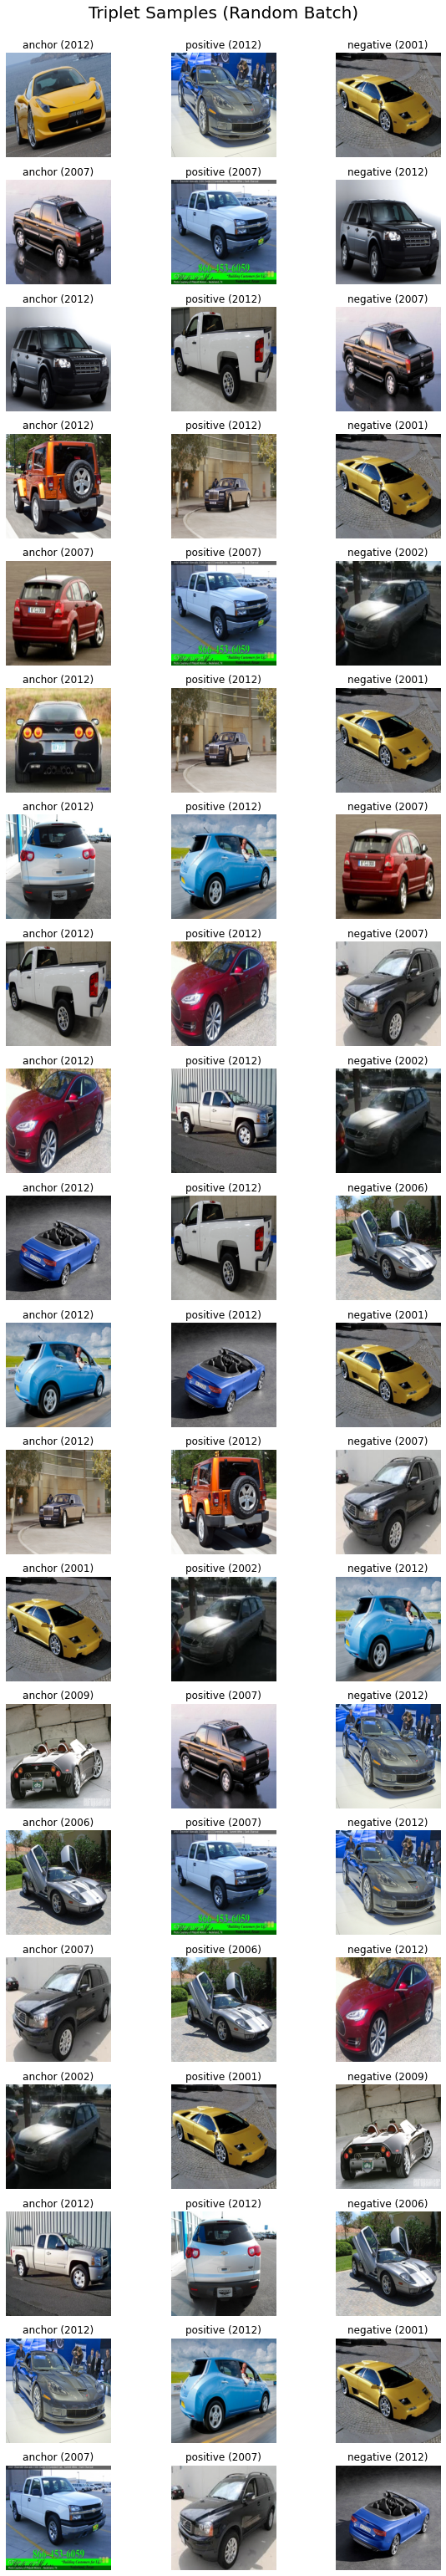

In [8]:
transform_to_image = ToPILImage()
fig, axs = plt.subplots(20, 3, figsize=(9, 45))
fig.suptitle("Triplet Samples (Random Batch)", fontsize=20)

for batch, (car_images, car_years) in enumerate(data_loader):

    for i in range(len(car_images)):

        anchor_index = i
        positive_index = pick_index_of_positive_sample(anchor_index, car_years.numpy())
        negative_index = pick_index_of_negative_sample(anchor_index, car_years.numpy())

        for j, (label, idx) in enumerate(zip(['anchor', 'positive', 'negative'], [anchor_index, positive_index, negative_index])):
            image = transform_to_image(car_images[idx])
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
            axs[i, j].set_title(f"{label} ({car_years[idx]})")
        
    break

plt.tight_layout(rect=[0, 0.03, 1, 0.98])